##Loading the dataset

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('/content/chat_dataset.csv')

In [10]:
df.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [11]:
# labelling the target data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df['sentiment'] = le.fit_transform(df['sentiment'])

In [13]:
df['sentiment']

0      2
1      0
2      1
3      2
4      0
      ..
579    0
580    0
581    0
582    0
583    0
Name: sentiment, Length: 584, dtype: int64

## Data Cleaning

In [14]:
df.isnull().sum()

message      0
sentiment    0
dtype: int64

In [15]:
# duplicated values
df.duplicated().sum()

38

In [16]:
# keep='first': This argument specifies that you want to keep the first occurrence of each duplicated row and drop the subsequent duplicates.
#Other options for the keep parameter are 'last' to keep the last occurrence and False to drop all duplicates.

In [17]:
# removing duplicated values
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(546, 2)

## EDA

In [20]:
# what percent of data is positive ,negative and neutral
df['sentiment'].value_counts()

1    232
2    172
0    142
Name: sentiment, dtype: int64

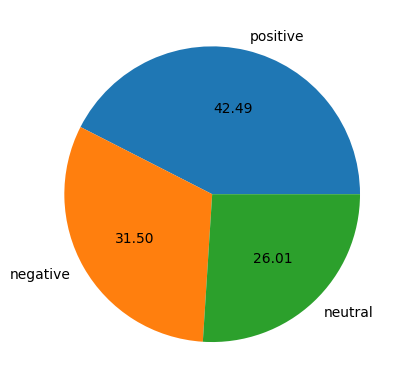

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels=['positive','negative','neutral'],autopct='%0.2f')
plt.show()

In [22]:
!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['characters'] = df['message'].apply(len)

In [26]:
df.head()

,message,sentiment,characters
0,I really enjoyed the movie,2,26
1,The food was terrible,0,21
2,I'm not sure how I feel about this,1,34
3,The service was excellent,2,25
4,I had a bad experience,0,22


In [27]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,message,sentiment,characters,num_words
0,I really enjoyed the movie,2,26,5
1,The food was terrible,0,21,4
2,I'm not sure how I feel about this,1,34,9
3,The service was excellent,2,25,4
4,I had a bad experience,0,22,5


In [29]:
df['num_sentence'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,message,sentiment,characters,num_words,num_sentence
0,I really enjoyed the movie,2,26,5,1
1,The food was terrible,0,21,4,1
2,I'm not sure how I feel about this,1,34,9,1
3,The service was excellent,2,25,4,1
4,I had a bad experience,0,22,5,1


In [31]:
# positive
df[df['sentiment']==2][['num_words','characters','num_sentence']].describe()

,num_words,characters,num_sentence
count,172.000000,172.000000,172.000000
mean,8.406977,40.284884,1.197674
std,3.676631,14.754331,0.399408
min,4.000000,18.000000,1.000000
25%,5.000000,29.000000,1.000000
50%,8.000000,38.000000,1.000000
75%,11.000000,50.000000,1.000000
max,19.000000,91.000000,2.000000


In [32]:
#negative
df[df['sentiment']==0][['num_words','characters','num_sentence']].describe()

,num_words,characters,num_sentence
count,142.000000,142.000000,142.000000
mean,8.549296,39.563380,1.049296
std,4.355770,16.201946,0.247755
min,4.000000,19.000000,1.000000
25%,5.000000,26.000000,1.000000
50%,7.000000,36.000000,1.000000
75%,11.000000,50.000000,1.000000
max,23.000000,105.000000,3.000000


In [33]:
#neutral
df[df['sentiment']==1][['num_words','characters','num_sentence']].describe()

,num_words,characters,num_sentence
count,232.000000,232.000000,232.000000
mean,7.594828,33.646552,1.051724
std,3.030804,11.468952,0.240664
min,4.000000,14.000000,1.000000
25%,5.000000,24.000000,1.000000
50%,7.000000,32.500000,1.000000
75%,10.000000,41.000000,1.000000
max,16.000000,76.000000,3.000000


In [34]:
# plotting all the three the categories
import seaborn as sns

<Axes: ylabel='characters'>

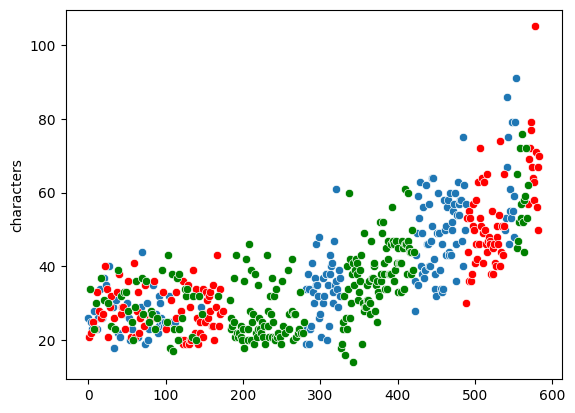

In [35]:
sns.scatterplot(df[df['sentiment']==2]['characters'])
sns.scatterplot(df[df['sentiment']==0]['characters'],color='red')
sns.scatterplot(df[df['sentiment']==1]['characters'],color='green')

<Axes: ylabel='num_words'>

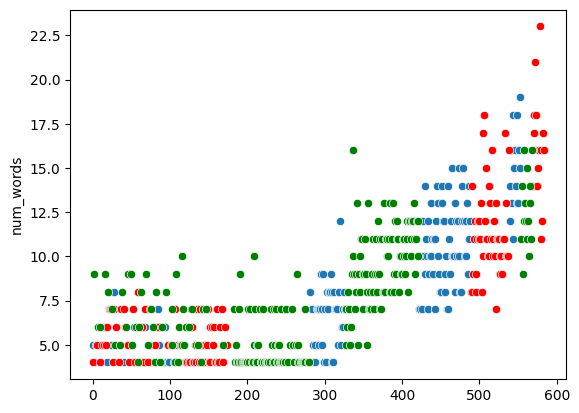

In [36]:
sns.scatterplot(df[df['sentiment']==2]['num_words'])
sns.scatterplot(df[df['sentiment']==0]['num_words'],color='red')
sns.scatterplot(df[df['sentiment']==1]['num_words'],color='green')

<Axes: ylabel='num_sentence'>

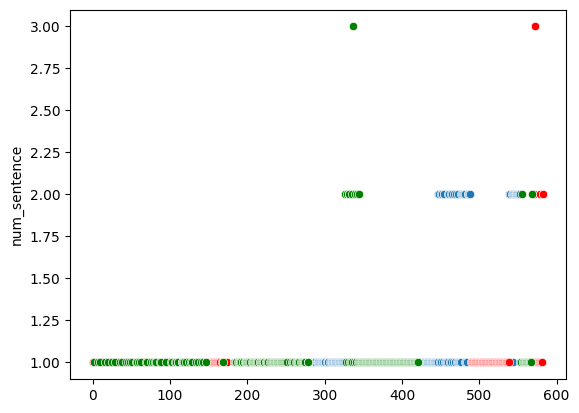

In [37]:
sns.scatterplot(df[df['sentiment']==2]['num_sentence'])
sns.scatterplot(df[df['sentiment']==0]['num_sentence'],color='red')
sns.scatterplot(df[df['sentiment']==1]['num_sentence'],color='green')

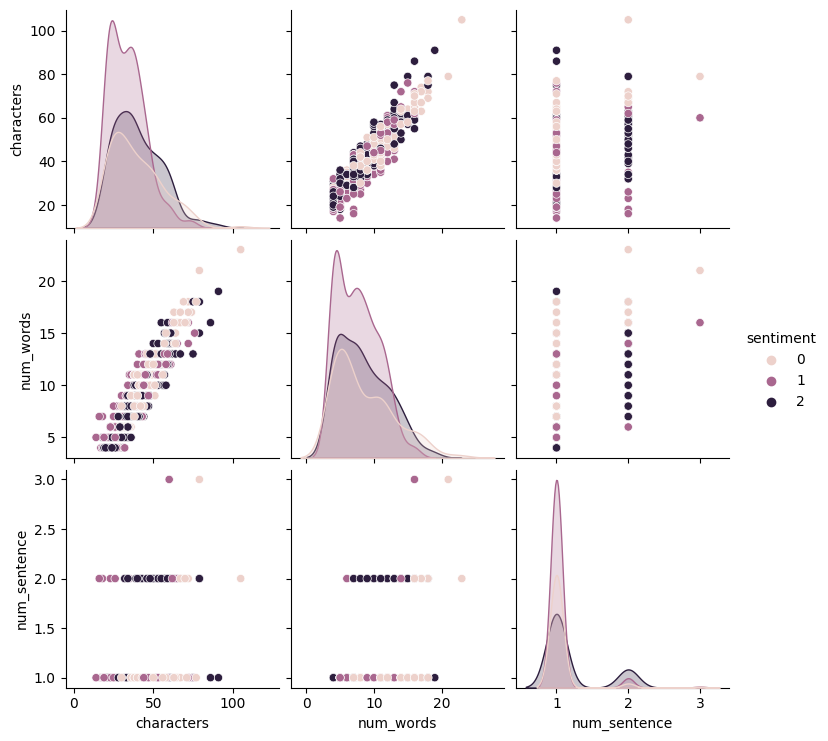

In [38]:
sns.pairplot(df,hue='sentiment')

<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

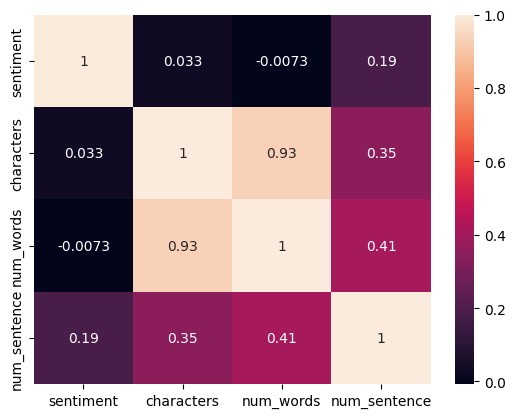

In [39]:
sns.heatmap(df.corr(),annot=True)

## Text preprocessing

In [40]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
from nltk.corpus import stopwords

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [44]:
df['transformed_text'] = df['message'].apply(transform_text)

In [45]:
df.head()

,message,sentiment,characters,num_words,num_sentence,transformed_text
0,I really enjoyed the movie,2,26,5,1,realli enjoy movi
1,The food was terrible,0,21,4,1,food terribl
2,I'm not sure how I feel about this,1,34,9,1,sure feel
3,The service was excellent,2,25,4,1,servic excel
4,I had a bad experience,0,22,5,1,bad experi


In [46]:
# now we will create word cloud of positive , negative and neutral
from wordcloud import WordCloud

In [47]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
positive_wc = wc.generate(df[df['sentiment']==2]['transformed_text'].str.cat(sep=" "))

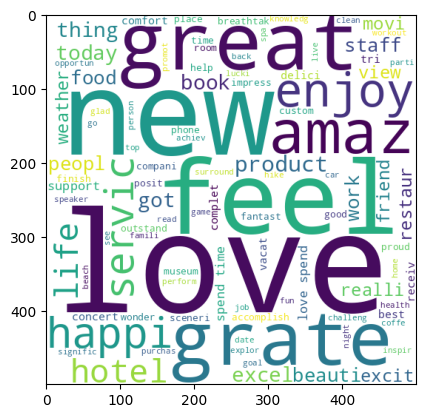

In [49]:
plt.imshow(positive_wc)

In [50]:
negative_wc = wc.generate(df[df['sentiment']==0]['transformed_text'].str.cat(sep=" "))

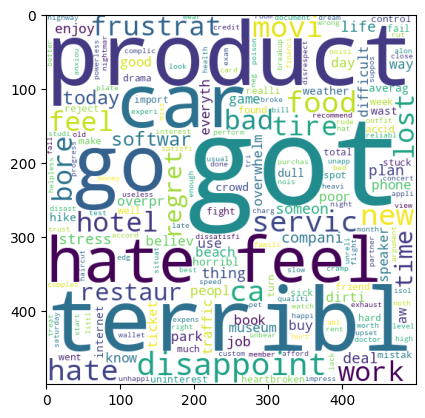

In [51]:
plt.imshow(negative_wc)

In [52]:
neutral_wc = wc.generate(df[df['sentiment']==1]['transformed_text'].str.cat(sep=" "))

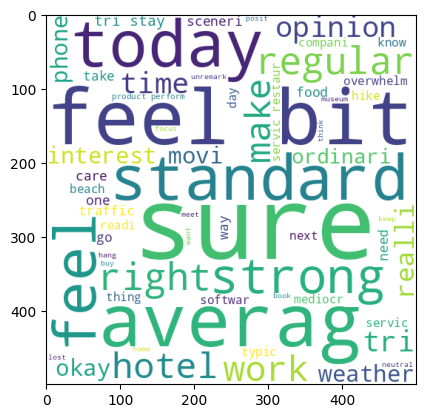

In [53]:
plt.imshow(neutral_wc)

In [54]:
# finding the top 30 words of positive ,negative and neutral


In [55]:
positive_corpus = []
for msg in df[df['sentiment']==2]['transformed_text'].tolist(): # The .tolist() method in NLP is used to convert a Pandas Series or DataFrame to a list.
   for word in msg.split():
    positive_corpus.append(word)

len(positive_corpus)

588

In [56]:
#The Counter is used to count the frequency of elements in a collection, such as a list or a string.
#In natural language processing (NLP), the Counter is often used to perform simple frequency analysis on text data.

In [57]:
from collections import Counter

In [58]:
Counter(positive_corpus).most_common(30)

[('love', 27),
 ('new', 15),
 ('feel', 13),
 ('great', 12),
 ('grate', 12),
 ('amaz', 11),
 ('enjoy', 10),
 ('happi', 10),
 ('servic', 9),
 ('hotel', 9),
 ('life', 9),
 ('product', 8),
 ('time', 8),
 ('excel', 7),
 ('today', 7),
 ('book', 7),
 ('got', 7),
 ('thing', 7),
 ('work', 6),
 ('beauti', 6),
 ('food', 6),
 ('staff', 6),
 ('peopl', 6),
 ('realli', 5),
 ('movi', 5),
 ('weather', 5),
 ('view', 5),
 ('excit', 5),
 ('restaur', 5),
 ('friend', 5)]

In [59]:
negative_corpus = []
for msg in df[df['sentiment']==0]['transformed_text'].tolist(): # The .tolist() method in NLP is used to convert a Pandas Series or DataFrame to a list.
   for word in msg.split():
    negative_corpus.append(word)

len(negative_corpus)

480

In [60]:
Counter(negative_corpus).most_common(30)

[('hate', 14),
 ('got', 14),
 ('feel', 13),
 ('terribl', 11),
 ('product', 11),
 ('go', 9),
 ('car', 8),
 ('disappoint', 7),
 ('food', 6),
 ('servic', 6),
 ('movi', 6),
 ('ca', 6),
 ('bad', 5),
 ('hotel', 5),
 ('bore', 5),
 ('frustrat', 5),
 ('work', 5),
 ('tire', 5),
 ('lost', 5),
 ('like', 5),
 ('regret', 4),
 ('restaur', 4),
 ('time', 4),
 ('today', 4),
 ('softwar', 4),
 ('compani', 4),
 ('stress', 4),
 ('deal', 4),
 ('life', 4),
 ('someon', 4)]

In [61]:
neutral_corpus = []
for msg in df[df['sentiment']==1]['transformed_text'].tolist(): # The .tolist() method in NLP is used to convert a Pandas Series or DataFrame to a list.
   for word in msg.split():
    neutral_corpus.append(word)

len(neutral_corpus)

626

In [62]:
Counter(neutral_corpus).most_common(30)

[('feel', 36),
 ('sure', 33),
 ('bit', 24),
 ('averag', 21),
 ('today', 16),
 ('standard', 15),
 ('tri', 13),
 ('strong', 9),
 ('regular', 9),
 ('right', 9),
 ('make', 8),
 ('servic', 8),
 ('hotel', 8),
 ('work', 8),
 ('opinion', 7),
 ('time', 7),
 ('realli', 6),
 ('interest', 6),
 ('movi', 6),
 ('okay', 6),
 ('phone', 6),
 ('weather', 6),
 ('ordinari', 6),
 ('stay', 6),
 ('care', 5),
 ('one', 5),
 ('way', 5),
 ('food', 5),
 ('sceneri', 5),
 ('perform', 5)]

##Model Building

In [63]:
# we will check countvectorizer and tfdf vectorizer

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [65]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(546, 530)

In [67]:
Y = df['sentiment'].values

In [68]:
Y.shape

(546,)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [70]:
x_train.shape


(436, 530)

In [71]:
x_test.shape


(110, 530)

In [72]:
y_train.shape

(436,)

In [73]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [74]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [75]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [76]:
gnb.fit(x_train,y_train)

GaussianNB()

In [77]:
y1 = gnb.predict(x_test)

In [78]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.7272727272727273
0.7272727272727273
[[21  7  1]
 [ 1 44  2]
 [ 6 13 15]]


In [79]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [80]:
y1 = bnb.predict(x_test)

In [81]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.6909090909090909
0.6909090909090909
[[11 16  2]
 [ 0 47  0]
 [ 1 15 18]]


In [82]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [83]:
y1 = mnb.predict(x_test)

In [84]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.7727272727272727
0.7727272727272727
[[19  6  4]
 [ 1 44  2]
 [ 5  7 22]]


In [85]:
# instead of using count vectorizer we can use TfIdf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tfidf = TfidfVectorizer()

In [87]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [88]:
X.shape

(546, 530)

In [89]:
Y = df['sentiment'].values

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [101]:
x_train.shape

(436, 530)

In [102]:
y_train.shape

(436,)

In [91]:
y_train=y_train.ravel()

In [92]:
y_test= y_test.ravel()

In [93]:
gnb.fit(x_train,y_train)
y1 = gnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.6727272727272727
0.6727272727272727
[[19  7  3]
 [ 5 39  3]
 [ 5 13 16]]


In [94]:
bnb.fit(x_train,y_train)
y1 = bnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.6909090909090909
0.6909090909090909
[[11 16  2]
 [ 0 47  0]
 [ 1 15 18]]


In [95]:
mnb.fit(x_train,y_train)
y1 = mnb.predict(x_test)
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.7454545454545455
0.7454545454545455
[[14 11  4]
 [ 0 45  2]
 [ 2  9 23]]


count vetcorizer and mnb is better

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [112]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision

In [113]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


for SVC
accuracy 0.8272727272727273
precision 0.8289436966856321
for KN
accuracy 0.6909090909090909
precision 0.7036939475618722
for NB
accuracy 0.7454545454545455
precision 0.771627079816735
for DT
accuracy 0.45454545454545453
precision 0.46198347107438026
for LR
accuracy 0.7272727272727273
precision 0.7876133359550807


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for RF
accuracy 0.7727272727272727
precision 0.792582144631325
for AdaBoost
accuracy 0.6909090909090909
precision 0.8058817002981763
for BgC
accuracy 0.8
precision 0.8285167011019284
for ETC
accuracy 0.8272727272727273
precision 0.8422273729075972
for GBDT
accuracy 0.7727272727272727
precision 0.8293807641633729
for xgb
accuracy 0.7636363636363637
precision 0.7865501770956317


In [114]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [115]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.827273,0.842227
9,GBDT,0.772727,0.829381
0,SVC,0.827273,0.828944
7,BgC,0.800000,0.828517
6,AdaBoost,0.690909,0.805882
5,RF,0.772727,0.792582
4,LR,0.727273,0.787613
10,xgb,0.763636,0.786550
2,NB,0.745455,0.771627
1,KN,0.690909,0.703694
